In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import numpy as np
import gdal
import cv2
dir = '/content/drive/MyDrive/Superai2/arv/VarunaHackathon2022/sentinel-2-image/'

In [ ]:
def calNDVI(path):
  # print(path)
  dsRed = gdal.Open(path + '_B04.jp2')
  bandRed = dsRed.GetRasterBand(1)
  arrRed = bandRed.ReadAsArray()

  dsNir = gdal.Open(path +'_B08.jp2')
  bandNir = dsNir.GetRasterBand(1)
  arrNir = bandNir.ReadAsArray()

  # Allow division by zero
  np.seterr(divide='ignore', invalid='ignore')

  # Calculate NDVI
  ndvi = (arrNir.astype(float) - arrRed.astype(float)) / (arrNir + arrRed)

  return ndvi

In [ ]:
def calSCL(path):
  # print(path)
  dsScl = gdal.Open(path + '_SCL.jp2')
  bandScl = dsScl.GetRasterBand(1)
  arrScl = bandScl.ReadAsArray()

  return arrScl

In [ ]:
import glob
from matplotlib import pyplot as plt

In [ ]:
years= ['2020','2021']
months= ['01','02','03','04','05','06','07','08','09','10','11','12']
for year in years:
  for month in months:
    all_ndvi = []
    all_SCL = []
    all_SCL_cloud = []
    print(year,month)
    for name in glob.glob(dir+year+'/'+year+month+'*'):
        # print(name[-8:])
        ndvi = calNDVI(dir + year+'/'+name[-8:]+'/IMG_DATA/47PQS_'+name[-8:])
        all_ndvi.append(ndvi)

        scr = calSCL(dir + year+'/'+name[-8:]+'/IMG_DATA/47PQS_'+name[-8:])
        all_SCL.append(scr)

        scr[scr>scr.max()-3] = -99999

        scr = cv2.resize(scr,(2051,2051))

        scr = np.ma.masked_where(scr>50,ndvi)

        scr = scr.astype('float64')

        all_SCL_cloud.append(scr) 
    # arr_cloud = all_SCL_cloud[0].astype('float64')
    arr_max = np.max(all_SCL_cloud, axis=0)
    arr_max[np.isnan(arr_max)] = -0.1
    # plt.imshow(arr_max)
    plt.imsave('/content/drive/MyDrive/Superai2/arv/com_ndvi/n'+year+month+'.jpg', arr_max)

      
    

2020 01
2020 02
2020 03
2020 04
2020 05
2020 06
2020 07
2020 08
2020 09
2020 10
2020 11
2020 12
2021 01
2021 02
2021 03
2021 04
2021 05
2021 06
2021 07
2021 08
2021 09
2021 10
2021 11
2021 12


/content/drive/MyDrive/Superai2/arv/Varuna Hackathon 2022-20220616T022720Z-001/Varuna Hackathon 2022/sentinel-2 image/2020/20200102/IMG_DATA/47PQS_20200102
/content/drive/MyDrive/Superai2/arv/Varuna Hackathon 2022-20220616T022720Z-001/Varuna Hackathon 2022/sentinel-2 image/2020/20200107/IMG_DATA/47PQS_20200107
/content/drive/MyDrive/Superai2/arv/Varuna Hackathon 2022-20220616T022720Z-001/Varuna Hackathon 2022/sentinel-2 image/2020/20200112/IMG_DATA/47PQS_20200112
/content/drive/MyDrive/Superai2/arv/Varuna Hackathon 2022-20220616T022720Z-001/Varuna Hackathon 2022/sentinel-2 image/2020/20200122/IMG_DATA/47PQS_20200122
/content/drive/MyDrive/Superai2/arv/Varuna Hackathon 2022-20220616T022720Z-001/Varuna Hackathon 2022/sentinel-2 image/2020/20200117/IMG_DATA/47PQS_20200117


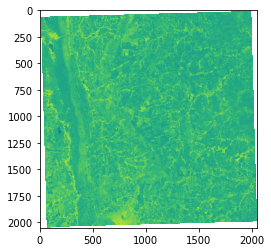

In [ ]:
all_ndvi = []
all_SCL = []
all_SCL_cloud = []
for name in glob.glob(dir+'2020/202001*'):
    # print(name[-8:])
    ndvi = calNDVI(dir + '2020/'+name[-8:]+'/IMG_DATA/47PQS_'+name[-8:])
    all_ndvi.append(ndvi)

    scr = calSCL(dir + '2020/'+name[-8:]+'/IMG_DATA/47PQS_'+name[-8:])
    all_SCL.append(scr)

    scr[scr>scr.max()-3] = -99999

    scr = cv2.resize(scr,(2051,2051))

    scr = np.ma.masked_where(scr>50,ndvi)
    all_SCL_cloud.append(scr) 


arr_cloud = all_SCL_cloud[0].astype('float64')
arr_max = np.max(all_SCL_cloud, axis=0)
arr_max[np.isnan(arr_max)] = -0.1

plt.imshow(arr_max)

plt.imsave('202001.png',arr_max, cmap = plt.cm.gray)
    

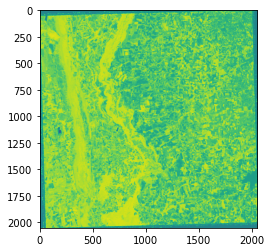

In [ ]:
plt.imshow(arr_max)